In [1]:
import json

import geopandasai as gai


gai.set_active_lite_llm_config({
    "model": "vertex_ai/gemini-2.0-flash",
    "vertex_credentials": json.dumps(json.load(open("google-credentials.json", "r")))
})




/tmp/ipykernel_1054206/980026585.py:6: DeprecationWarning: This function is deprecated and will be removed in future versions. Use `update_geopandas_ai_config` instead.
  gai.set_active_lite_llm_config({


In [2]:
gdfai = gai.read_file("shapefiles-production.geojson")
gdfai.set_description("This is a GeoDataFrame for the network of STIB in Brussels")

/home/gaspard/Documents/Dev/CoDE/geopandas-ai/.venv/lib/python3.12/site-packages/geopandas/geodataframe.py:223: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  super().__setattr__(attr, val)


,geo_point_2d,ligne,variante,color_hex,date_debut,date_fin,geometry
0,"{ ""lon"": 4.3450960600829145, ""lat"": 50.8481091...",002m,2,#ED6C23,10/03/2025,24/08/2025,"LINESTRING (4.3314 50.86287, 4.33205 50.86263,..."
1,"{ ""lon"": 4.3425755091516409, ""lat"": 50.8246710...",004t,2,#EA4F80,10/03/2025,24/08/2025,"LINESTRING (4.31874 50.79527, 4.31862 50.79537..."
2,"{ ""lon"": 4.3493580579694227, ""lat"": 50.8345928...",005m,2,#F6A90B,10/03/2025,24/08/2025,"LINESTRING (4.4285 50.8122, 4.42812 50.81216, ..."
3,"{ ""lon"": 4.3774227854546597, ""lat"": 50.8537833...",007t,1,#EFE048,10/03/2025,24/08/2025,"LINESTRING (4.34815 50.81338, 4.34848 50.81326..."
4,"{ ""lon"": 4.3775854418883711, ""lat"": 50.8535696...",007t,2,#EFE048,10/03/2025,24/08/2025,"LINESTRING (4.33814 50.89643, 4.3382 50.89641,..."
...,...,...,...,...,...,...,...
175,"{ ""lon"": 4.3586758001629287, ""lat"": 50.7937141...",192b,1,#E43C2E,10/03/2025,24/08/2025,"LINESTRING (4.3551 50.79452, 4.35526 50.79451,..."
176,"{ ""lon"": 4.4089927906435697, ""lat"": 50.8481888...",205b,2,#A67CB0,10/03/2025,24/08/2025,"LINESTRING (4.45922 50.84842, 4.45945 50.84846..."
177,"{ ""lon"": 4.3810464844918009, ""lat"": 50.8394556...",206b,1,#169FDB,10/03/2025,24/08/2025,"LINESTRING (4.35701 50.84588, 4.35687 50.84586..."
178,"{ ""lon"": 4.3853492826400569, ""lat"": 50.8261153...",209b,2,#C44F97,10/03/2025,24/08/2025,"LINESTRING (4.42912 50.81226, 4.42916 50.81226..."


<Figure size 1000x1000 with 1 Axes>

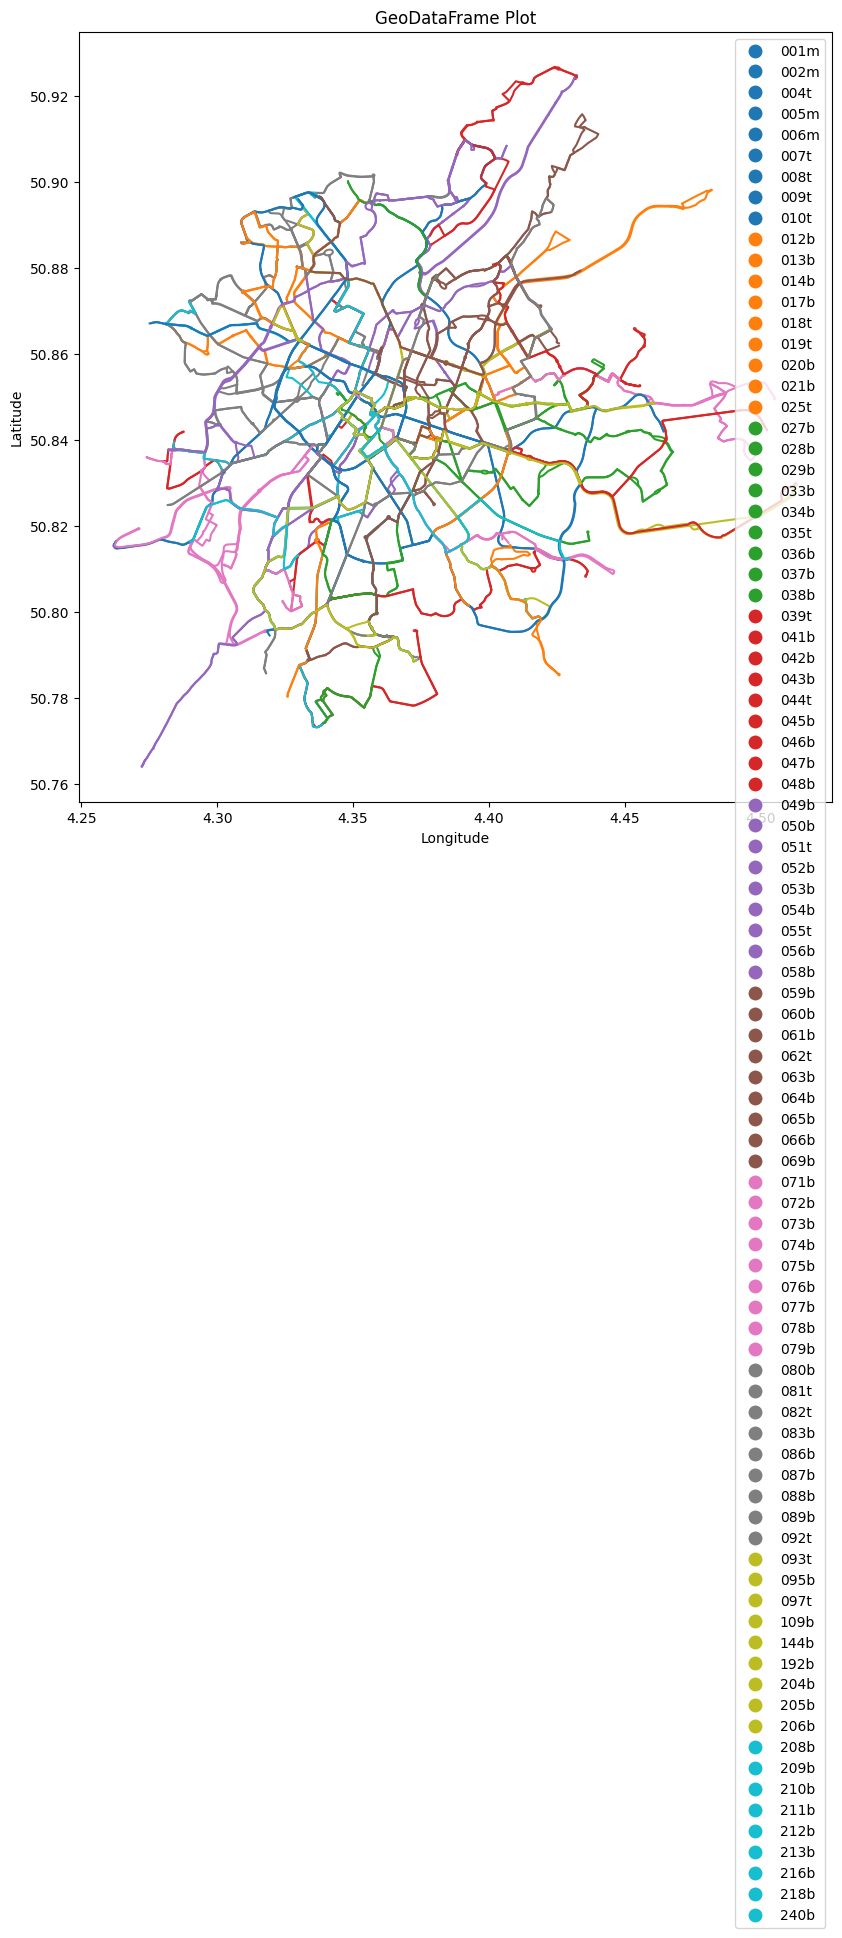

In [3]:
gdfai.chat("Plot the data")

<Figure size 1000x1000 with 1 Axes>

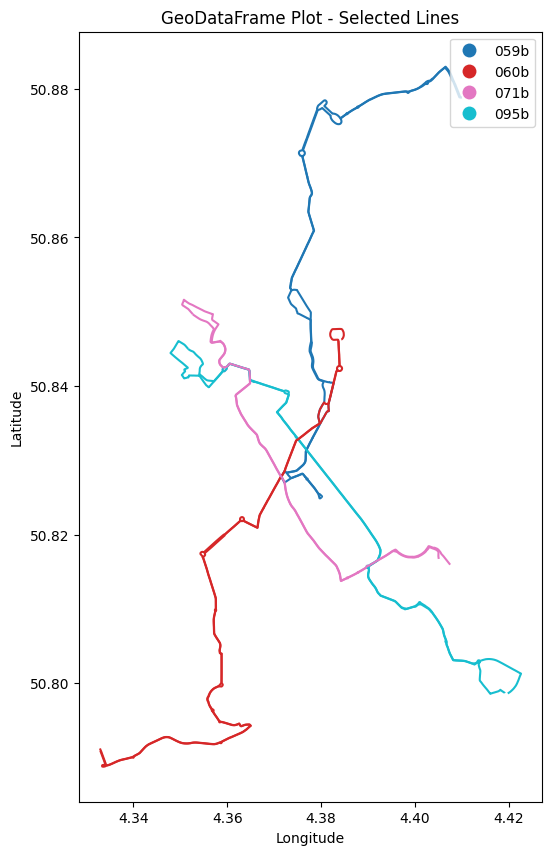

In [4]:
gdfai.improve("Only plot lines 59, 60, 71, and 95")

/tmp/tmper3seiah.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper left')


<Figure size 1000x1000 with 1 Axes>

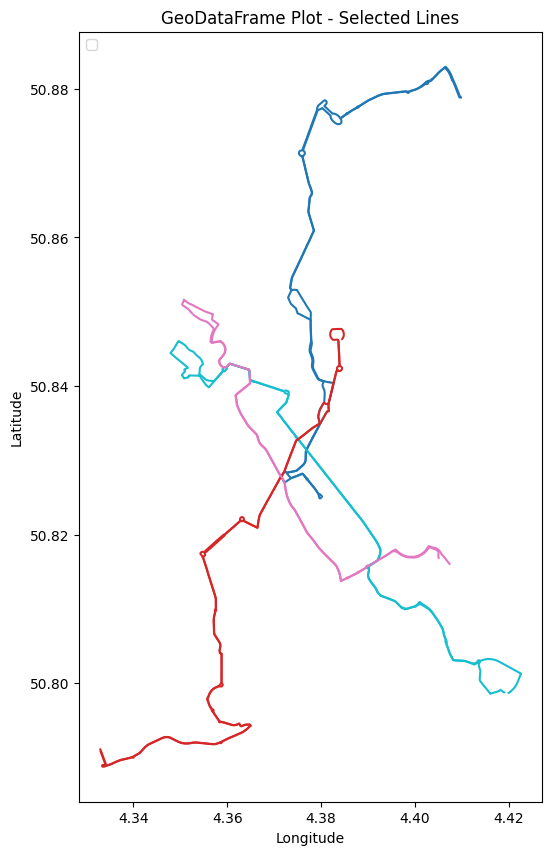

In [5]:
gdfai.improve("Add a legend")

/tmp/tmpa55uq4yq.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper left', title='Line Number')


<Figure size 1000x1000 with 1 Axes>

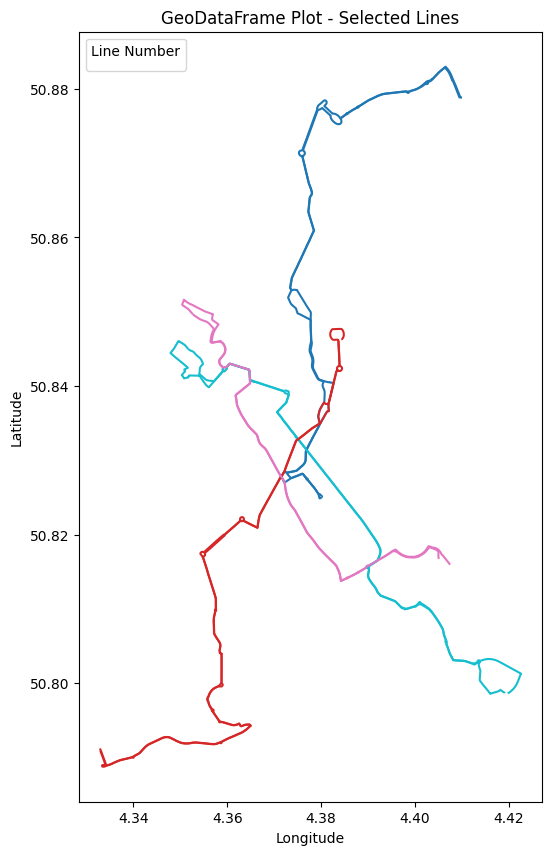

In [6]:
gdfai.improve("The legend should use the line number")

In [7]:
print(gdfai.code)


import geopandas
import matplotlib.pyplot as plt


def execute(df_1) -> plt.Figure:
    """Plot specific lines from the GeoDataFrame with a legend using line numbers.

    :param df_1: The input GeoDataFrame.
    :type df_1: geopandas.GeoDataFrame
    :return: A matplotlib Figure object.
    :rtype: matplotlib.figure.Figure
    """
    lines_to_plot = ['059b', '060b', '071b', '095b']

    # Filter the GeoDataFrame to include only the specified lines
    df_filtered = df_1[df_1['ligne'].isin(lines_to_plot)]

    fig, ax = plt.subplots(1, 1, figsize=(10, 10))  # Create a figure and an axes.
    df_filtered.plot(ax=ax, column='ligne', legend=True, categorical=True)

    # Customize the plot
    ax.set_title("GeoDataFrame Plot - Selected Lines")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")

    # Move legend to a better location (e.g., upper left)
    ax.legend(loc='upper left', title='Line Number')

    return fig



In [8]:
gdfai.inject("plot_on_map")

Manual injection procedure...
First add, if not already present, the following import statement:
import ai
Then replace the following code with the function call:
ai.plot_on_map(gdf1, gdf2, ...)


/home/gaspard/Documents/Dev/CoDE/geopandas-ai/ai/plot_on_map.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper left', title='Line Number')


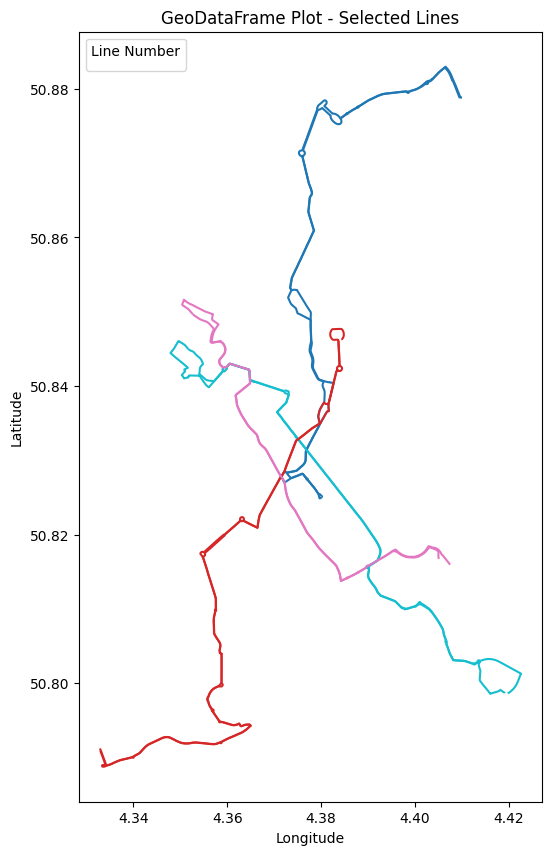

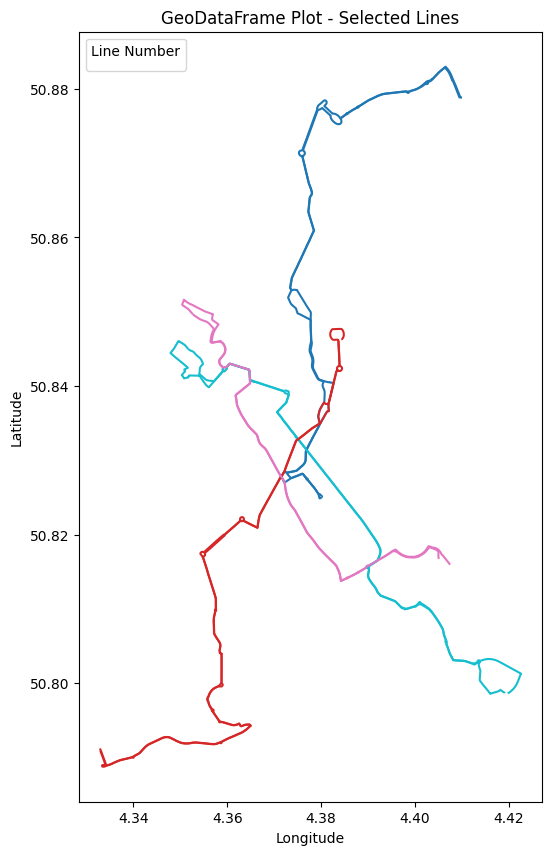

In [9]:
import ai

ai.plot_on_map(gdfai)